In [177]:
import pandas as pd
from os import listdir
from os.path import isfile, join

In [178]:
mypath = './data/yolo/train/labels/train/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [179]:
dfs = []
for file in onlyfiles:
    try:
        df = pd.read_csv(mypath + file, sep=" ", header = None)
        dfs.append(df)
    except:
        pass

In [180]:
df = pd.concat(dfs)

In [181]:
train_classes = pd.read_csv('./data/trainval_0629/train_classes.txt',
                            header=None)

In [182]:
train_classes = train_classes.reset_index()

In [183]:
train_classes = train_classes.rename(columns={0:'class'})

In [184]:
freqMap = df.groupby(0).count()[1]

In [185]:
freqMap = pd.DataFrame(freqMap).reset_index()

In [186]:
freqMap = freqMap.rename(columns={0:'index',  1:'count'})

In [187]:
freqMap_classes = pd.merge(train_classes, freqMap, on='index')

In [188]:
freqMap_classes

,index,class,count
0,0,Disposable fast food boxes,105
1,1,Books and papers,74
2,2,Power bank,176
3,3,Leftover food,176
4,4,Bag,282
5,5,Trash cans,25
6,6,Plastic kitchenware,20
7,7,Plastic containers,122
8,8,Plastic toys,8
9,9,Plastic hangers,49


In [193]:
import matplotlib.pyplot as plt
freqMap_classes = freqMap_classes.sort_values('count', ascending=False)
freqMap_classes

,index,class,count
41,42,Ceramic containers,454
19,20,Contaminated plastic,453
12,13,Plugs and wires,413
16,17,Fruit peels and pulp,349
35,36,Expired medications,319
21,22,Toiletries,311
24,25,Glass containers,284
4,4,Bag,282
14,15,Cans,277
40,41,Pots,258


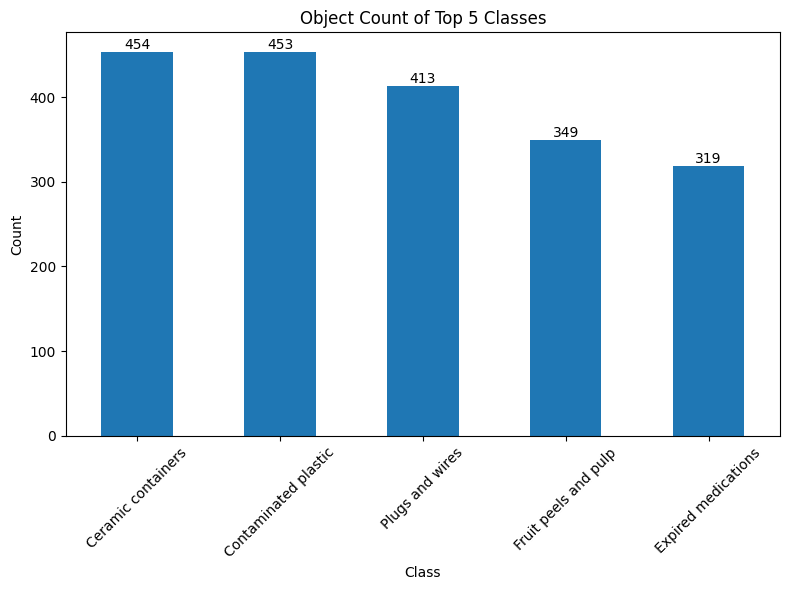

In [192]:
import matplotlib.pyplot as plt
freqMap_classes = freqMap_classes.sort_values('count', ascending=False)
top_5_classes = freqMap_classes.head(5)
top_5_classes = top_5_classes.set_index('class')
ax = top_5_classes.plot(kind='bar', y='count', figsize=(8, 6), legend=False)

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Object Count of Top 5 Classes')

# Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout for proper spacing
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df = freqMap_classes
df = df.set_index('category')
ax = df.plot(kind='bar', y='count', figsize=(8, 6), legend=False)

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Frequency of Categories')

# Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            ha='center', va='bottom')

plt.show()

In [157]:
type = pd.read_json('./data/trainval_0629/classify_rule.json', orient='index')

In [158]:
type = type.T

In [159]:
type_col = type.columns

In [160]:
cats = []
for col in type_col:
    type_list = type[col][type[col].isna() != True]
    keys = [col] * len(type_list)
    
    cat = pd.DataFrame({
        'category': keys,
        'class': type_list
    })
    cats.append(cat)

In [161]:
cat = pd.concat(cats)

In [162]:
freqMap_category = pd.merge(freqMap_classes, cat, on='class')

In [163]:
del freqMap_category['index']

In [164]:
freqMap_category = freqMap_category[['category', 'class', 'count']]

In [165]:
freqMap_category = freqMap_category.sort_values('category').reset_index(drop=True)

In [173]:
freqMap_category = freqMap_category.groupby('category').sum()['count'].reset_index()

In [174]:
freqMap_category

,category,count
0,Hazardous waste,65
1,Kitchen waste,541
2,Other waste,1277
3,Recyclables,3383


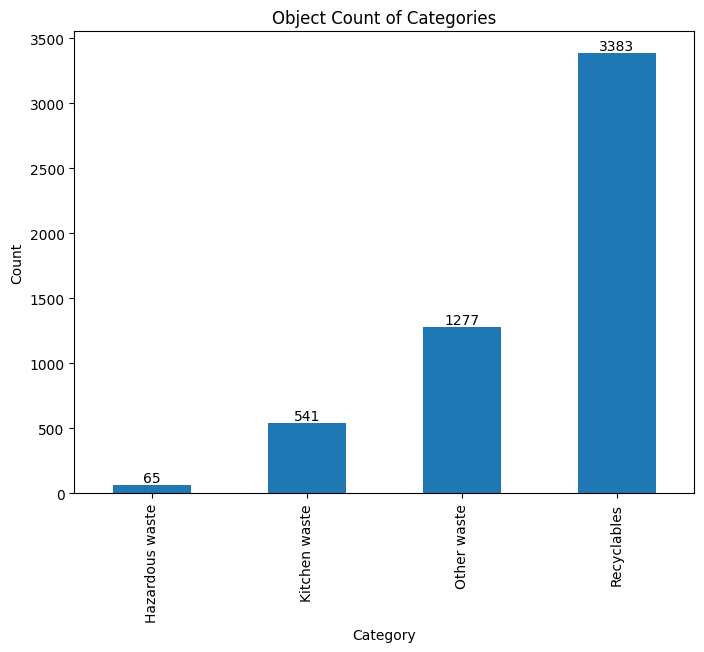

In [196]:
import matplotlib.pyplot as plt

df = freqMap_category

df = df.set_index('category')

ax = df.plot(kind='bar', y='count', figsize=(8, 6), legend=False)

ax.set_xlabel('Category')

ax.set_ylabel('Count')

ax.set_title('Object Count of Categories')

# Add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            ha='center', va='bottom')

plt.show()